<a href="https://colab.research.google.com/github/pkor725/world-happiness-report-hypothesis-testing/blob/master/Master_Week_5_Core_Group_Project_World_Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Happiness Report
Rankings of national happiness based on respondent ratings of their own lives based on ranking of 1 to 10.

Report also correlates happiness score with various life factors such as economic production, social support, life expectancy, freedom, absence of corruption, and generosity contribute to the happiness score

Data collected from Kaggle for rankings between 2015 and 2019.

Research question : Is the effect of GDP on happiness greater than that of corruption?

## 1.0 Import Libraries and Data

In [0]:
#Import Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats #For z test Calculation
from statsmodels.stats import weightstats as stests #For z test calculation
import pandas_profiling as pp
from statistics import mean  #For mean calculation
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [0]:
#Increase number of rows and columns displayed
pd.set_option('display.max_rows', 5000)

In [0]:
#Import data
df_2015 = pd.read_csv("2015.csv")
df_2016 = pd.read_csv("2016.csv")
df_2017 = pd.read_csv("2017.csv")
df_2018 = pd.read_csv("2018.csv")
df_2019 = pd.read_csv("2019.csv")

## 2.0 Exploring the Data

### 2.1 Merging the Dataframes

In [0]:
#Checking that the columns are the same to merge the dataframes
print(df_2015.columns)
print(df_2016.columns)
print(df_2017.columns)
print(df_2018.columns)
print(df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Fre

In [0]:
#Dropping unnecessary columns
df_2015.drop(columns=['Standard Error', 'Region', 'Dystopia Residual'], inplace=True)
df_2016.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval', 'Region', 'Dystopia Residual'], inplace=True)
df_2017.drop(columns=['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], inplace=True)

In [0]:
#Changing the order of 2017 dataframe
df_2017 = df_2017[['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Trust..Government.Corruption.', 'Generosity']]

In [0]:
#Adding a column with the year of data collection
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019

In [0]:
#Reorder the columns so as to have same order across all the years.
df_2015 = df_2015[['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Generosity', 'Trust (Government Corruption)', 'Year']]
df_2016 = df_2016[['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Generosity', 'Trust (Government Corruption)', 'Year']]
df_2017 = df_2017[['Happiness.Rank', 'Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom','Generosity', 'Trust..Government.Corruption.', 'Year']]


In [0]:
#Rename the columns
df_2015.columns = ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year']
df_2016.columns = ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year']
df_2017.columns = ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year']

In [0]:
#Checking the column names
print(df_2015.columns)
print(df_2016.columns)
print(df_2017.columns)
print(df_2018.columns)
print(df_2019.columns)

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year'],
      dtype='object')
Index(['Overall rank', 'Coun

In [0]:
# Merging the data
df_all = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019])
df_all.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


### 2.1 Data Understanding

In [0]:
#Check sample data
df_all

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Switzerland,7.587,1.396510,1.349510,0.941430,0.665570,0.296780,0.419780,2015
1,2,Iceland,7.561,1.302320,1.402230,0.947840,0.628770,0.436300,0.141450,2015
2,3,Denmark,7.527,1.325480,1.360580,0.874640,0.649380,0.341390,0.483570,2015
3,4,Norway,7.522,1.459000,1.330950,0.885210,0.669730,0.346990,0.365030,2015
4,5,Canada,7.427,1.326290,1.322610,0.905630,0.632970,0.458110,0.329570,2015
5,6,Finland,7.406,1.290250,1.318260,0.889110,0.641690,0.233510,0.413720,2015
6,7,Netherlands,7.378,1.329440,1.280170,0.892840,0.615760,0.476100,0.318140,2015
7,8,Sweden,7.364,1.331710,1.289070,0.910870,0.659800,0.362620,0.438440,2015
8,9,New Zealand,7.286,1.250180,1.319670,0.908370,0.639380,0.475010,0.429220,2015
9,10,Australia,7.284,1.333580,1.309230,0.931560,0.651240,0.435620,0.356370,2015


In [0]:
df_all.shape

(782, 10)

Dataset has 782 rows and 10 columns

In [0]:
#Explore the column data types
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 10 columns):
Overall rank                    782 non-null int64
Country or region               782 non-null object
Score                           782 non-null float64
GDP per capita                  782 non-null float64
Social support                  782 non-null float64
Healthy life expectancy         782 non-null float64
Freedom to make life choices    782 non-null float64
Generosity                      782 non-null float64
Perceptions of corruption       781 non-null float64
Year                            782 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 67.2+ KB


1 column is of string date type while rest are numeric.

In [0]:
#Check Null Columns
df_all.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
Year                            0
dtype: int64

We will replace the null record in the dataset with a mean value.

In [0]:
#Replacing missing values with median. Reason: Column has outlier hence median is better than mean.
df_all['Perceptions of corruption'].fillna((df_all['Perceptions of corruption'].median()), inplace=True)

In [0]:
# Drop Unnecesary columns
df = df_all[['Overall rank','Country or region','Score', 'GDP per capita', 'Perceptions of corruption']]
# Copy dataframe to prevent slicing
df = df.copy()

In [0]:
df.sample(5)

,Overall rank,Country or region,Score,GDP per capita,Perceptions of corruption
35,36,Qatar,6.375,1.82427,0.48049
27,28,Qatar,6.611,1.69042,0.52208
33,34,Singapore,6.262,1.57200,0.45300
47,48,Ecuador,5.973,0.88900,0.12000
98,99,Greece,5.033,1.24886,0.04127


In [0]:
#Corruption distribution

df_2019.sort_values(by = 'Perceptions of corruption')

df_strat

NameError: ignored

## 3.0 Exploratory Data Analysis

### 3.1 Univariate Analysis


a) Statistical Distribution


In [0]:
df.describe()

,Overall rank,Score,GDP per capita,Perceptions of corruption
count,782.000000,782.000000,782.000000,782.000000
mean,78.698210,5.379018,0.916047,0.125392
std,45.182384,1.127456,0.407340,0.105756
min,1.000000,2.693000,0.000000,0.000000
25%,40.000000,4.509750,0.606500,0.054250
50%,79.000000,5.322000,0.982205,0.091000
75%,118.000000,6.189500,1.236187,0.155861
max,158.000000,7.769000,2.096000,0.551910


In [0]:
# Detailed statistics including range, quartile, kurtosis and skewness
col_names = ['Score', 'GDP per capita','Perceptions of corruption','Overall rank']
for i, col_val in enumerate(col_names):
    print("Mean:", df[col_val].mean())
    print("Median:", df[col_val].median())
    print("Mode:", df[col_val].mode())
    print("SD:", df[col_val].std())
    print("Variance:", df[col_val].var())
    # print("Range:", col_val_max - col_val_min)
    print("Quartiles:", df[col_val].quantile([0.25,0.5,0.75]))
    print("Skewness:", df[col_val].skew())
    print("Kurtosis:", df[col_val].kurt())
    print("\n")

Mean: 5.379017902998665
Median: 5.322
Mode: 0    2.905
1    4.350
2    5.129
3    5.192
4    5.835
5    5.890
6    6.375
7    6.379
dtype: float64
SD: 1.127456460155013
Variance: 1.2711580695452724
Quartiles: 0.25    4.50975
0.50    5.32200
0.75    6.18950
Name: Score, dtype: float64
Skewness: 0.035859433273691114
Kurtosis: -0.7610545865625724


Mean: 0.9160474824829727
Median: 0.9822047088146211
Mode: 0    0.0
dtype: float64
SD: 0.40734013128981933
Variance: 0.16592598255920726
Quartiles: 0.25    0.606500
0.50    0.982205
0.75    1.236187
Name: GDP per capita, dtype: float64
Skewness: -0.3185805094075457
Kurtosis: -0.6927595053792621


Mean: 0.12539157826211203
Median: 0.091
Mode: 0    0.082
dtype: float64
SD: 0.1057558511589716
Variance: 0.011184300054358554
Quartiles: 0.25    0.054250
0.50    0.091000
0.75    0.155861
Name: Perceptions of corruption, dtype: float64
Skewness: 1.522756372214541
Kurtosis: 1.8875809619169508


Mean: 78.69820971867007
Median: 79.0
Mode: 0     34
1     57

b) Numerical variables Distribution

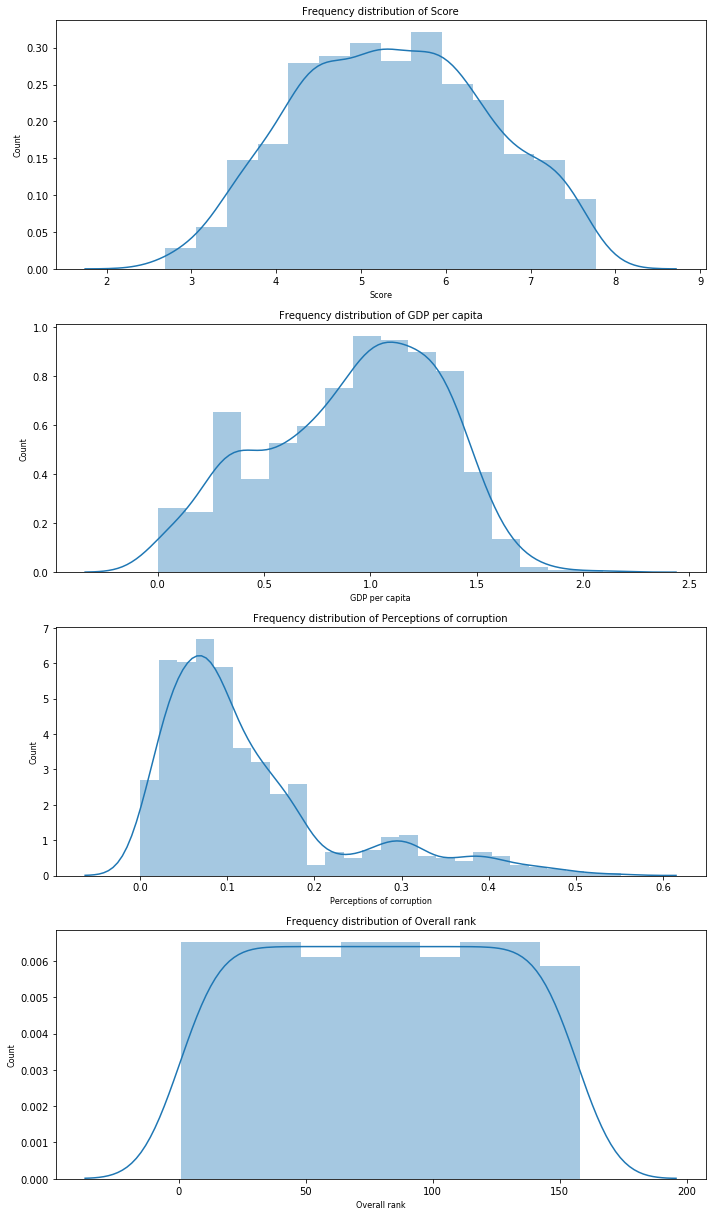

In [0]:
# Plotting distribution of numerical variables
col_names = ['Score', 'GDP per capita','Perceptions of corruption','Overall rank']
fig, ax = plt.subplots(len(col_names), figsize=(10,17))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show()

**Observations**
**a) Skewness**

1. Score and GDP per capita are fairly symetrical as they have skewness between 0 and 0.5

3. Perception of corruption is highly positively skewed.

**b) Kurtosis**
1. The distributions for all the variables are platkurtic as they have low kurtosis

Testing for Normality

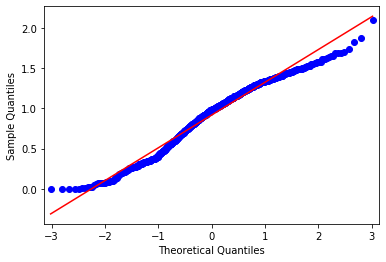

Statistics=0.9740, p=0.0000
Sample does not look Gaussian


In [0]:
#Q-Q Plot for GDP per capita
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import shapiro

qqplot(df['GDP per capita'], line='s')
pyplot.show()
stat, p = shapiro(df['GDP per capita'])
print('Statistics=%.4f, p=%.4f' %(stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

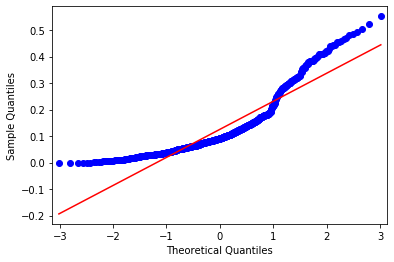

Statistics=0.8384, p=0.0000
Sample does not look Gaussian


In [0]:
#Q-Q Plot for Perceptions of corruption
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(df['Perceptions of corruption'], line='s')
pyplot.show()
stat, p = shapiro(df['Perceptions of corruption'])
print('Statistics=%.4f, p=%.4f' %(stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

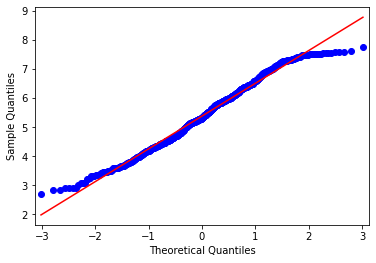

Statistics=0.9852, p=0.0000
Sample does not look Gaussian


In [0]:
#Q-Q Plot for Happiness Score
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(df['Score'], line='s')
pyplot.show()
stat, p = shapiro(df['Score'])
print('Statistics=%.4f, p=%.4f' %(stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')


### 3.2 Normalizing
As per QQ Plot, Perception of corruption is not normal hence normalization is required.

Method 1: Normalize using BoxCox


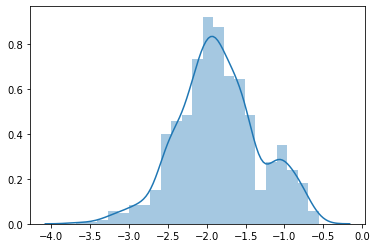

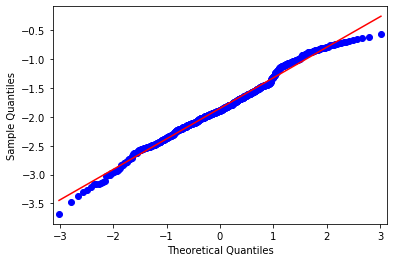

Statistics=0.9906, p=0.0001
Sample does not look Gaussian


In [0]:
# import modules
from scipy import stats

non_zero = df[df["Perceptions of corruption"]>0]

# transform corruption data using boxcox from stats package.
corruption,fitted_lambda = stats.boxcox(non_zero['Perceptions of corruption'])

# Plot subplot
fig, ax=plt.subplots()
sns.distplot(corruption)

# plot qqplot after transformation
qqplot(corruption, line='s')
pyplot.show()

# Normality evaluation using shapiro
stat, p = shapiro(corruption)
print('Statistics=%.4f, p=%.4f' %(stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Method 2: Log Transformation

(array([201., 265., 136.,  58.,  25.,  46.,  21.,  17.,  10.,   3.]),
 array([0.      , 0.055191, 0.110382, 0.165573, 0.220764, 0.275955,
        0.331146, 0.386337, 0.441528, 0.496719, 0.55191 ]),
 <a list of 10 Patch objects>)

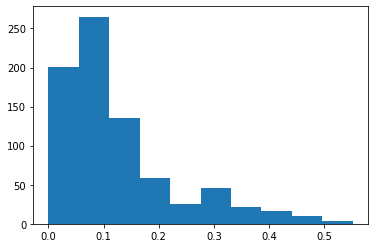

In [0]:
#Selecting data to normalize
data = df['Perceptions of corruption']
plt.hist(data)

(array([155., 239., 154., 101.,  21.,  39.,  30.,  27.,  12.,   4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

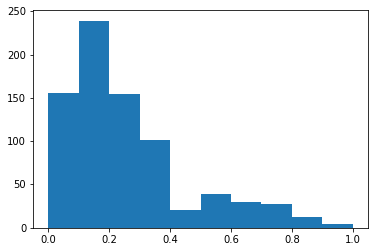

In [0]:
#Log transforming data and normalizing
data_log = np.log(data + 1)

def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y


data_log_normalized = normalize(data_log)
data_log_normalized.describe()

plt.hist(data_log_normalized)

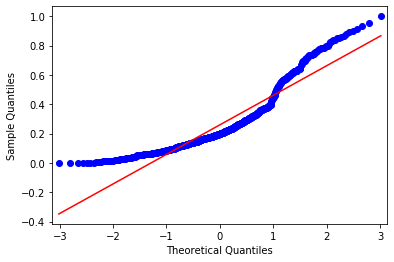

Statistics=0.8690, p=0.0000
Sample does not look Gaussian


In [0]:
#Checking if data is normalized
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import shapiro

qqplot(data_log_normalized, line='s')
pyplot.show()
stat, p = shapiro(data_log_normalized)
print('Statistics=%.4f, p=%.4f' %(stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

### 3.3 Checking outliers

In [0]:
#Outlier: 
col_names = numeric_clmns = df.dtypes[df.dtypes != "object"].index

fig, ax = plt.subplots(len(col_names), figsize=(6,20))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.tight_layout()
plt.show()

NameError: ignored

Observations:

a) Score and GDP per capita columns have no outliers

b) Perceptions of corruption has outliers. That notwithstanding, the outliers will not be dropped as they are of reasonable range compared to mean.


### 3.4 Bi-variate analysis

In [0]:

#Checking for correlations between the variables
plt.figure(dpi=100)
cor=df.corr(method = 'spearman')
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot = True)
plt.xticks( rotation=45)
plt.title('Correlation between variables')
plt.show

NameError: ignored

a) GDP versus happiness Score

Text(0.5, 0, 'Score')

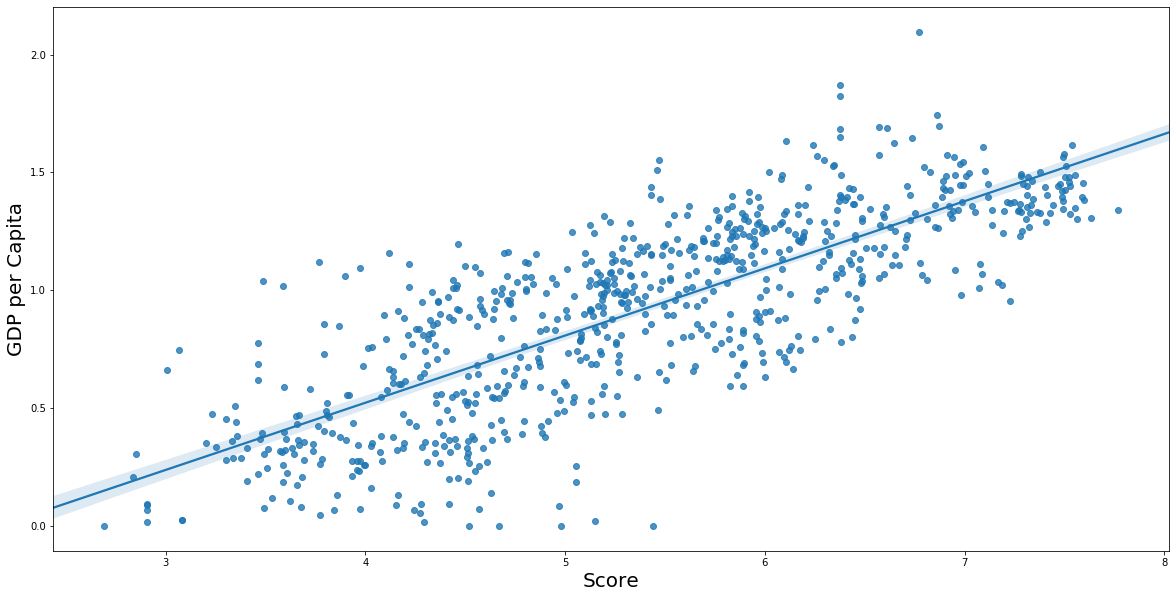

In [0]:
#scatterplot of the happiness score against the GDP per capita
# plt.figure(figsize=(20,10))
# plt.title('Score versus GDP')

# sns.scatterplot(df.Score,df['GDP per capita'],hue=df.Score)

plt.figure(figsize = (20,10))
sns.regplot(df.Score,df['GDP per capita'])
# plt.title('GDP verses Perceptions on corruption',fontsize = 20)
plt.ylabel('GDP per Capita',fontsize = 20)
plt.xlabel('Score',fontsize = 20)


Observations

* There is a strong positive corelation between the GDP per capita and the happiness score. i.e An increase in the GDP per capita has a direct positive effect on the happiness score.

 b) Perceptions on corruption versus happiness Score



Text(0.5, 0, 'Score')

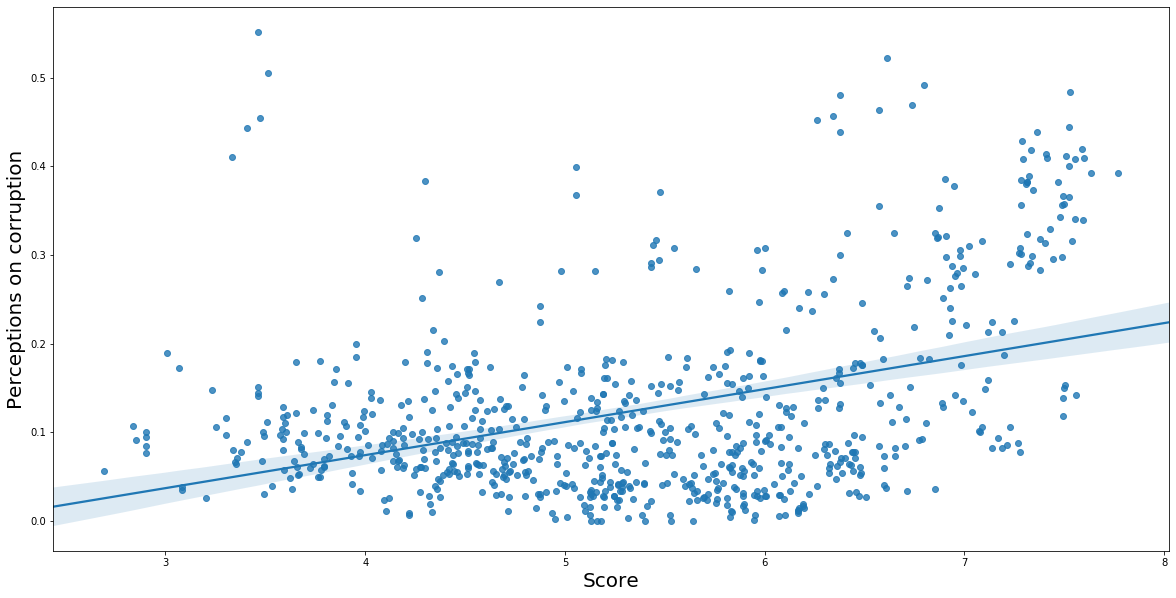

In [0]:
#scatterplot of the happiness score against the perceptions of corruption
# plt.figure(figsize=(20,10))
# plt.title('Perceptions on corruption versus Happiness Score')

# sns.scatterplot(df.Score,df['Perceptions of corruption'],hue=df.Score)

plt.figure(figsize = (20,10))
sns.regplot(df.Score,df['Perceptions of corruption'])
# plt.title('GDP verses Perceptions on corruption',fontsize = 20)
plt.ylabel('Perceptions on corruption',fontsize = 20)
plt.xlabel('Score',fontsize = 20)

Observations

* There is a moderate positive corelation between the perception of corruption and the happiness score. An increase in corruption increases affects the happiness score.

c) GDP versus perceptions of corruption


Text(0.5, 0, 'GDP')

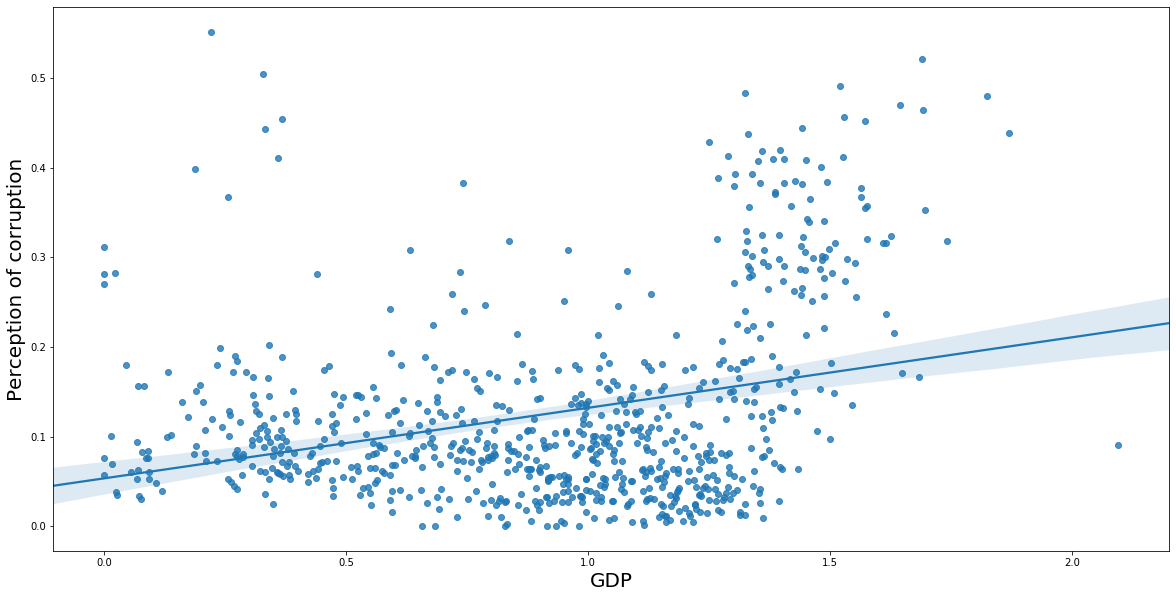

In [0]:
#scatterplot of the happiness score against the perceptions of corruption
# plt.figure(figsize=(20,10))

# plt.figure(figsize = (10,8))
# sns.regplot(df.sqft_living, df.Price)
plt.figure(figsize = (20,10))
sns.regplot(df['GDP per capita'],df['Perceptions of corruption'])
# plt.title('GDP verses Perceptions on corruption',fontsize = 20)
plt.ylabel('Perception of corruption',fontsize = 20)
plt.xlabel('GDP',fontsize = 20)

Observation

There is a weak positive corelation between the GDP per capita and perceptions of corruption. An increase in the GDP per capita slightly increases the perceptions of corruption.

## 4.0 Sampling

#### 4.1 Sampling Approach

Stratified sampling to be used

#### 4.2 New Strata Feature Creation

Create a new strata based on Happiness score.
This is to ensure all happiness scores are well represented in the sample

In [0]:
# Creating strata based on happiness score.
#Procedure to assign strata based on Happiness score
def assign_strata():
# Create a list to store the data
    strata = []
    # For each row in the column,
    for score in df['Score']:
        if score >= 2 and score <= 3.5:
            strata.append(1)      
        elif score >= 3.5 and score <= 5.0:
            strata.append(2)
        elif score >= 5 and score <= 6.5:
            strata.append(3)
        elif score >= 6.5 and score <= 8:
            strata.append(4) 

 # Create a column from the list
    df['strata'] = strata

#Execute the procedure
assign_strata()

In [0]:
#Distributions of records per strata
df['strata'].value_counts().sort_values()

1     33
4    133
2    265
3    351
Name: strata, dtype: int64

In [0]:
#Viewing the new strata column
df.sample()
df

,Overall rank,Country or region,Score,GDP per capita,Perceptions of corruption,strata
152,153,Benin,3.484,0.394990,0.066810,1
151,152,Yemen,3.355,0.442000,0.064000,1
153,154,Burundi,2.905,0.091623,0.084148,1
156,157,Burundi,2.905,0.015300,0.100620,1
157,158,Togo,2.839,0.208680,0.107310,1
151,152,Rwanda,3.334,0.359000,0.411000,1
153,154,Afghanistan,3.203,0.350000,0.025000,1
149,150,Malawi,3.410,0.191000,0.089000,1
147,148,Botswana,3.488,1.041000,0.100000,1
153,154,Afghanistan,3.360,0.382270,0.071120,1


#### 4.3 Sample Size

Stratified sampling to be applied where 33% of records will be selected from each strata

Cochran's formula applied to calculate sample


In [0]:
# Stratified sample
df_strat = df.groupby('strata', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.33))
print(df_strat.shape)
df_strat['strata'].value_counts().sort_values()

(258, 6)


1     11
4     44
2     87
3    116
Name: strata, dtype: int64

d) Distribution before and after sampling

Population distribution per strata before sampling

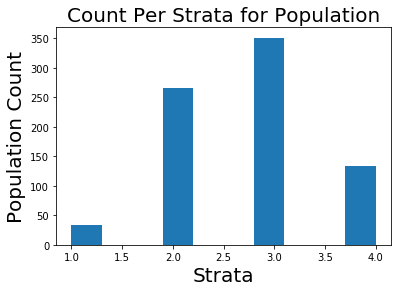

In [0]:
# histogram plot of whole population per strata
plt.hist(df['strata'])
plt.xlabel("Strata",fontsize = 20)
plt.ylabel("Population Count",fontsize = 20)
plt.title("Count Per Strata for Population",fontsize = 20)
plt.show()

Distribution per strata after sampling

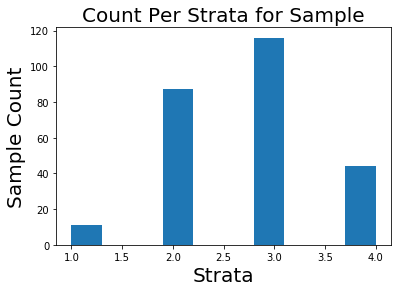

In [0]:
#Distribution post sampling
plt.hist(df_strat['strata'])
plt.xlabel("Strata",fontsize = 20)
plt.ylabel("Sample Count",fontsize = 20)
plt.title("Count Per Strata for Sample",fontsize = 20)
plt.show()

The distribution pattern before sampling and after sampling is similar hence sampling was well distributed across all strata.

e) Was Sample selected by Chance?  
Multiple Samples Approach using stratified and quota



In [0]:
#Function to calculate correlation
def get_spearman_cor(dataframe, column1, column2):
  corr_value = dataframe[column1].corr(dataframe[column2], method = 'spearman')
  return corr_value

# Function to return list of gdp and corruption
def corr_significance(loop_count,approach):
  gdp_sum = 0
  corruption_r = 0
  quota_size = 30
  sample_frac_size =0.33
  gdp_list = []
  corruption_list = []
  for i in range(1,loop_count):
    if approach == 'stratified':
      df_strat = df.groupby('strata', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=sample_frac_size))
    elif approach == 'quota':
      df_strat = df.groupby('strata', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(quota_size))

    gdp_r = get_spearman_cor(df_strat,'Score','GDP per capita')
    corruption_r = get_spearman_cor(df_strat,'Score','Perceptions of corruption')
    gdp_list.append(gdp_r)
    corruption_list.append(corruption_r)
  return (gdp_list,corruption_list)

##Execute the procedures
#Stratified Sampling Output
gdp_list_s,corruption_list_s = corr_significance(30,'stratified')
average_gdp_corr_s = mean(gdp_list_s)
average_corruption_corr_s = mean(corruption_list_s)

# Quota sampling output. 
# gdp_list_q,corruption_list_q = corr_significance(30,'quota')
# average_gdp_corr_q = mean(gdp_list_q)
# average_corruption_corr_q = mean(corruption_list_q)

#Population Output
population_corruption_corr = df['Score'].corr(df['Perceptions of corruption'], method = 'spearman')
population_gdp_corr = df['Score'].corr(df['GDP per capita'], method = 'spearman')

print("STRATA: Average Correlation across 30 sample sets are GDP: " ,average_gdp_corr_s, " Corruption ",average_corruption_corr_s)
# print("QUOTA: Average Correlation across 30 sample sets are GDP: " ,average_gdp_corr_q, " Corruption ",average_corruption_corr_q)
print("POPULATION Correlation : GDP ",population_gdp_corr , ' Corruption :', population_corruption_corr)

STRATA: Average Correlation across 30 sample sets are GDP:  0.8099340047449453  Corruption  0.283646143099139
POPULATION Correlation : GDP  0.8061889765252575  Corruption : 0.273008379425089


**Summary**
Strata approach selected over quota as it has correlation similar to quota sampling.

Strata - fair representation

Quota - equal representation


## 5.0 Hypothesis Testing

#### 5.1 Hypothesis

**Null Hypothesis :**
H0: The contribution of GDP to the happiness score is less than or equal to the contribution of the perception of corruption.

Alternative Hypothesis: 
Ha: The contribution of GDP to the happiness score is greater than the contribution of the perception corruption.

Since the null hypothesis is testing greater than scenario, this will be a one tailed test

#### 5.2 Significance Level

Significance level of to validate the hypothesis above is 0.05 i.e confidence level of 95%

#### 5.3 Correlation coefficients

Since the data is not normally distributed, the Spearman Rank Correlation test will be used as it is non-parametric (does not assume normal distribution).
This will give us correlation coefficients to compare the effect of GDP vs perception of corruption on happiness score.

In [0]:
#Calculating Spearman Rank Correlation coefficients
df_strat.corr(method = 'spearman')

,Overall rank,Score,GDP per capita,Perceptions of corruption,strata
Overall rank,1.000000,-0.998062,-0.829784,-0.320271,-0.929360
Score,-0.998062,1.000000,0.827648,0.319096,0.930453
GDP per capita,-0.829784,0.827648,1.000000,0.290131,0.799076
Perceptions of corruption,-0.320271,0.319096,0.290131,1.000000,0.304333
strata,-0.929360,0.930453,0.799076,0.304333,1.000000


#### 5.4 Z- score and P-Value Calculation

The correlation coefficients will be converted to z scores using the Fisher's r to z transformation.

In [0]:
#Calculating the z score
import math
n = df_strat.shape[0]
print('n =', n)
s = math.sqrt((1/n) + (1/n))
print('s =', s)

print('The Spearman Rank Correlation coefficient for GDP is', average_gdp_corr_s)
print('The Spearman Rank Correlation coefficient for perception of corruption is', average_corruption_corr_s)
z = (average_gdp_corr_s - average_corruption_corr_s)/s
print('z score =', z)

n = 258
s = 0.08804509063256238
The Spearman Rank Correlation coefficient for GDP is 0.8099340047449453
The Spearman Rank Correlation coefficient for perception of corruption is 0.283646143099139
z score = 5.977481059587497


In [0]:
#calculating the p-value
from scipy.stats import norm

p_value = 1- stats.norm.cdf(z)
print('Non rounded p value =', p_value)
p_value =round(p_value, 6)
print('Rounded p value =', p_value)

alpha = 0.05

#Procedure to evaluate hypothesis results
def hypothesis_eval(p_value,alpha):
  #P-value <= significance level (a) => Reject your null hypothesis in favor of your alternative hypothesis.  Your result is statistically significant.
  if p_value < alpha:
    result = "Result: Reject the null hypothesis and conclude that the effect is statistically significant"
  else:
    #P-value > significance level (a) => Fail to reject your null hypothesis.  Your result is not statistically significant.
    result = "Fail to reject the null hypothesis"
  return result

hypothesis_eval(p_value, alpha)

Non rounded p value = 1.1330713034496398e-09
Rounded p value = 0.0


'Result: Reject the null hypothesis and conclude that the effect is statistically significant'

## 6.0 Outcome Summary

**Outcome:**

We  reject the null hypothesis that the contribution of GDP to the happiness score is less than or equal to the contribution of perception of corruption, with a P-Value which is a fraction of 0.0....

**Recommendation**

Above signifies the key impact GDP has on happiness of the population. This might imply as much as the political class focuses on fighting corruption, GDP is a bigger enabler on the long run on happiness of the citizens.

**Sensitivity Test. TYPE 1 error**

1. Notably, reducing the sample size does not have impact on the result as the p value is very small i.e it's a fraction of zero. This means the probability of Type 1 error occuring due to incorrect sample size is eliminated.

2. That notwithstanding, the gallop poll happiness survey only had interviewed 1000 people per country. If the interviewed people in the survey was not representative enough, data provided to calculate the p-value may have been wrong hence probability of committing type 1 error.

3. During sampling, we observed over-representation in some of the bins which had higher numbers compared to other bins. Not well sized bins may result to sampling errors. We did more multiple samples sets i.e 30. By so doing, correlation of sample is close to that of population. A better approach in future might be having more bins. This minimizes risk of type 1 error.